## 1. Import Library

In [3]:
import cv2
import matplotlib.pyplot as plt
import json
import os

## 2.1. Visualize Json

In [43]:
def show_json_label_on_image(image_path, json_path, box_color=(0,255,0), thickness=2):
    """
    원본 이미지와 json 어노테이션이 시각화된 이미지를 1행 2열로 출력합니다.
    """
    # 이미지 로딩 (BGR->RGB 변환)
    img = cv2.imread(image_path)
    if img is None:
        print(f"이미지 파일을 찾을 수 없습니다: {image_path}")
        return
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # 원본 이미지 (복사 필요)
    img_viz = img_rgb.copy()                         # 시각화 이미지

    # json 로딩
    if not os.path.exists(json_path):
        print(f"json 파일을 찾을 수 없습니다: {json_path}")
        return
    with open(json_path, "r", encoding='utf-8') as f:
        data = json.load(f)
    
    # 이미지 해상도 정보
    meta = data.get("meta", {})
    img_w, img_h = 0, 0
    resolution = meta.get("Resolution", "")
    if 'x' in resolution:
        try:
            img_w, img_h = map(int, resolution.split('x'))
        except Exception as e:
            print("Resolution 정보 파싱 오류:", e)
    
    # 박스 정보 추출
    ann = data.get("annotations", {}).get("Bbox Annotation", {})
    boxes = ann.get("Box", [])

    for box in boxes:
        class_name = box.get('category_name', 'unknown')
        x, y, w, h = box['x'], box['y'], box['w'], box['h']
        if img_w == 0 or img_h == 0:
            img_h, img_w = img_viz.shape[:2]
        x1 = int(x)
        y1 = int(y)
        x2 = int(x + w)
        y2 = int(y + h)
        cv2.rectangle(img_viz, (x1, y1), (x2, y2), box_color, thickness)
        label = "Illegal Parking"
        cv2.putText(img_viz, label, (x1, max(y1-10,0)), cv2.FONT_HERSHEY_SIMPLEX, 0.8, box_color, 2)
    
    # 1행 2열로 원본, 시각화 모두 보여주기
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(img_viz)
    plt.title('With annotation')
    plt.axis('off')
    plt.show()


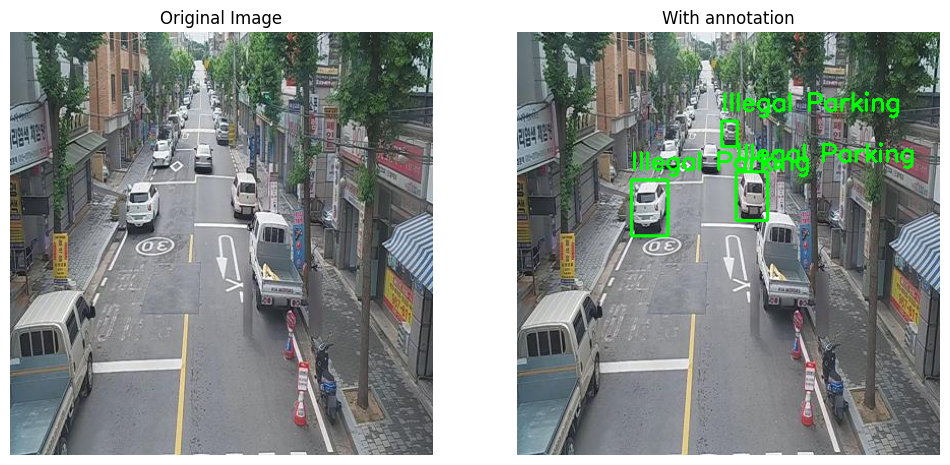

In [61]:
dataset_base_path = "C:/Users/chobh/Desktop/bigProject/custom_dataset"  # 데이터 경로
split = "train"  # "train" 또는 "val"

img_list = os.listdir(os.path.join(dataset_base_path, split, "images"))


img_filename = img_list[1118]
json_filename = os.path.splitext(img_filename)[0] + ".json"

image_path = os.path.join(dataset_base_path, split, "images", img_filename)
json_path = os.path.join(dataset_base_path, split, "annotations", json_filename)

# 클래스명 매핑 딕셔너리 예시 (선택, 실제 클래스명에 맞게 확장)
# class_name_map = {'불법주정차SUV(낮)': '불법주정차'}
class_name_map = None

show_json_label_on_image(image_path, json_path)

# 2.2 Visualize txt

In [4]:
def show_yolo_label_on_image(image_path, label_path, box_color=(0, 0, 255), thickness=2):
    """
    YOLO 포맷의 txt 파일을 사용하여 bounding box를 시각화합니다.
    - image_path: 이미지 파일 경로
    - label_path: YOLO 형식의 .txt 라벨 경로
    """
    # 이미지 로딩 (BGR → RGB 변환)
    img = cv2.imread(image_path)
    if img is None:
        print(f"[!] 이미지 파일을 찾을 수 없습니다: {image_path}")
        return
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_viz = img_rgb.copy()
    img_h, img_w = img_viz.shape[:2]

    # YOLO 라벨 파일 확인
    if not os.path.exists(label_path):
        print(f"[!] 라벨 파일을 찾을 수 없습니다: {label_path}")
        return

    with open(label_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, parts)
        
        # 좌표 복원 (정규화 → 절대 픽셀 좌표)
        x1 = int((x_center - width / 2) * img_w)
        y1 = int((y_center - height / 2) * img_h)
        x2 = int((x_center + width / 2) * img_w)
        y2 = int((y_center + height / 2) * img_h)
        
        # 시각화
        cv2.rectangle(img_viz, (x1, y1), (x2, y2), box_color, thickness)
        cv2.putText(img_viz, f"Illegal Parking", (x1, max(y1 - 10, 0)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, box_color, 2)

    # 결과 출력
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_viz)
    plt.title("YOLO Annotation")
    plt.axis("off")
    plt.show()


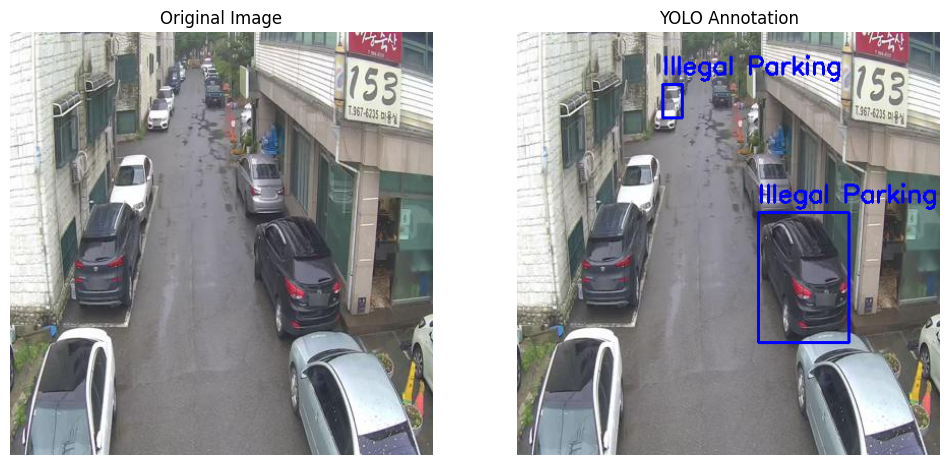

In [14]:
dataset_base_path = "C:/Users/chobh/Desktop/bigProject/Data/oneclass_illegal_parking_dataset"  # 데이터 경로
split = "train"  # "train" 또는 "val"

txt_list = os.listdir(os.path.join(dataset_base_path, "labels", split))



txt_filename = txt_list[2]
img_filename = os.path.splitext(txt_filename)[0] + ".jpg"

image_path = os.path.join(dataset_base_path, "images", split, img_filename)
json_path = os.path.join(dataset_base_path, "labels", split, txt_filename)


show_yolo_label_on_image(image_path, json_path)